In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
mushroom = pd.read_csv("data/mushrooms.csv")

In [11]:
# define independent variable and dependent variable
var_ind = mushroom.iloc[:, 1:23]
var_dep = mushroom.iloc[:, 0]

In [12]:
# creat and fit ohe model, get the independent variable after ohe
ohe = OneHotEncoder(sparse_output=False)
var_ohe = ohe.fit_transform(var_ind)

In [15]:
# creat and fit kmeans model
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=50, random_state=20)
kmeans.fit(var_ohe)
# get predicted value
labels = kmeans.labels_
mushroom['Cluster'] = labels

In [17]:
# validation by ARI, AMI, V_measure

y_true = mushroom["class"]
y_pred = mushroom["Cluster"]

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix, classification_report

ari = adjusted_rand_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
v_measure = v_measure_score(y_true, y_pred)

print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Adjusted Mutual Information: {ami:.2f}")
print(f"V-Measure: {v_measure:.2f}")

Adjusted Rand Index: 0.62
Adjusted Mutual Information: 0.56
V-Measure: 0.56


In [20]:
result_kmean_mm = pd.crosstab(mushroom['class'], mushroom['Cluster'])

In [21]:
result_kmean_mm

Cluster,0,1
class,,
e,4148,60
p,816,3100


In [26]:
(4148+3100)/(4196+3160)

0.9853181076672104

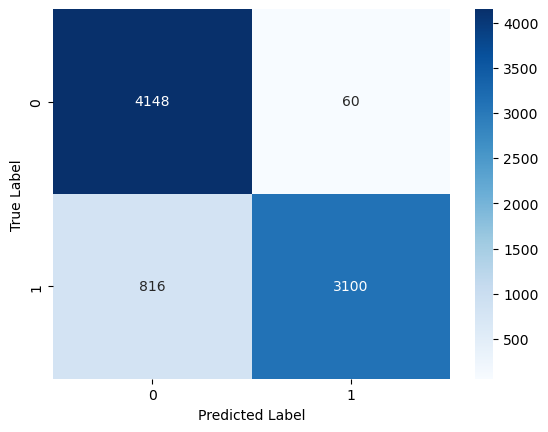

In [32]:
# validation by confusion matrix
mushroom['class'] = mushroom['class'].replace({'p': 1, 'e': 0})
y_true = mushroom["class"]
y_pred = mushroom["Cluster"]

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
ari = adjusted_rand_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
v_measure = v_measure_score(y_true, y_pred)

print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Adjusted Mutual Information: {ami:.2f}")
print(f"V-Measure: {v_measure:.2f}")

Adjusted Rand Index: 0.62
Adjusted Mutual Information: 0.56
V-Measure: 0.56
